<h1 style="text-align: center;">Gastronomic Insights: Analyzing Indian Culinary Traditions</h1>


Indian cuisine encompasses a rich tapestry of regional and traditional culinary practices native to the Indian subcontinent. The diversity of soil, climate, culture, ethnic groups, and occupations across this region contributes to the substantial variations in cuisine, utilizing locally sourced spices, herbs, vegetables, and fruits.

Religious beliefs, cultural preferences, and long-standing traditions also significantly shape Indian food. Historical influences such as invasions, trade relations, and colonialism have introduced various ingredients and cooking methods, further enriching the culinary landscape.

Recognized as one of the most diverse cuisines globally, Indian cuisine is celebrated for its sophisticated and nuanced use of a wide array of spices, vegetables, grains, and fruits. Each geographical region boasts a unique assortment of dishes and cooking techniques, reflecting the ethnically diverse demographics of the Indian subcontinent.



In [4]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
food_data = pd.read_csv('F:/portfolio projects/EDA_mini_project/Indian Cuisine Analysis/indian_food.csv')

In [6]:
food_data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West


In [7]:
food_data.shape

(255, 9)

In [8]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [9]:
food_data.isna().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [10]:
food_data = food_data.replace(-1, np.nan)
food_data = food_data.replace('-1', np.nan)


In [11]:
food_data.isna().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [12]:
pie_data = food_data.diet.value_counts().reset_index()

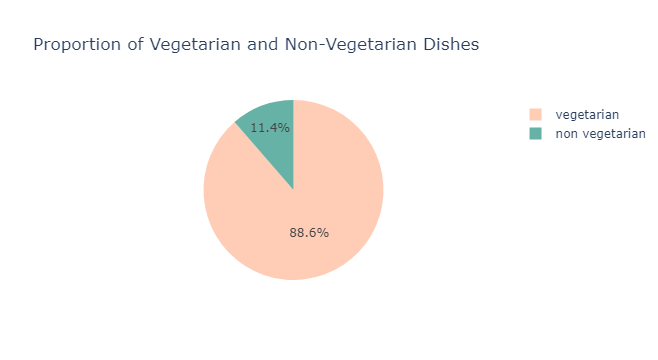

In [24]:
pie_data.columns = ['diet', 'count']

# Define colors
Soft_Peach = '#FFCCB6'  # For vegetarian
Light_Teal = '#66B2A6'  # For non-vegetarian

# Create the pie chart
fig = px.pie(
    pie_data,
    values='count',
    names='diet',
    title='Proportion of Vegetarian and Non-Vegetarian Dishes',
    color_discrete_sequence=[Soft_Peach, Light_Teal]  # Updated colors
)

fig.show()


In [27]:
print(food_data.columns)


Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')


In [28]:
sweet_data = food_data[food_data['flavor_profile'] == 'sweet']
final_sweet_data = sweet_data[sweet_data['course'] != 'dessert']
final_sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


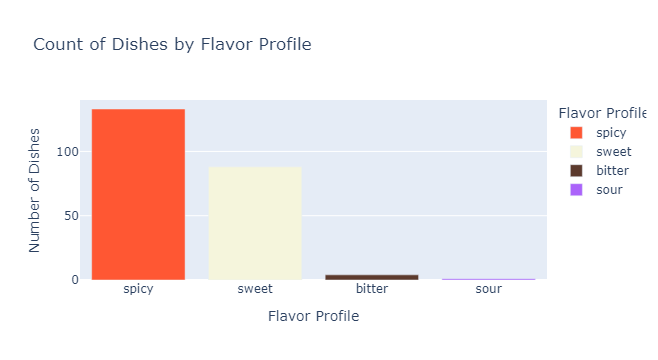

In [29]:
import plotly.express as px

# Count the occurrences of each flavor profile
flavor_counts = food_data['flavor_profile'].value_counts().reset_index()
flavor_counts.columns = ['flavor', 'count']

# Define color mapping for each flavor
color_map = {
    'sweet': '#F5F5DC',       # Off-white or cream for sweet
    'spicy': '#FF5733',       # Red for spicy
    'bitter': '#5C3A2D'       # Dark chocolate color for bitter
}

# Create the bar chart
fig = px.bar(
    flavor_counts,
    x='flavor',
    y='count',
    title='Count of Dishes by Flavor Profile',
    labels={'flavor': 'Flavor Profile', 'count': 'Number of Dishes'},
    color='flavor',
    color_discrete_map=color_map  # Use the color mapping
)

fig.show()


### Insights

**1.Flavor Popularity Visualization:** The bar chart clearly illustrates the distribution of different flavor profiles in the dataset. This visualization lets stakeholders quickly grasp which flavors are prevalent in the current offerings.

**2. Guided Recipe Development:** By highlighting the most common flavors, the chart serves as a valuable tool for recipe developers. It identifies potential areas for expansion, encouraging the creation of new dishes that align with popular tastes.

**3. Market Trends Analysis:** The representation of flavors can inform marketing strategies. Understanding which flavors are favored can help tailor promotions and seasonal menus to enhance customer satisfaction and engagement.

**4. Culinary Innovation:** The color-coded distinction between sweet, spicy, and bitter flavors provides insights into culinary trends, encouraging chefs to experiment with unique flavor combinations and develop innovative dishes that appeal to diverse palates.

In [30]:
cooking_time = food_data[['name','cook_time']]

In [31]:
cooking_time.head()

,name,cook_time
0,Balu shahi,25.0
1,Boondi,30.0
2,Gajar ka halwa,60.0
3,Ghevar,30.0
4,Gulab jamun,40.0


In [39]:
# Sort the DataFrame by cook_time in ascending order
cooking_time = cooking_time.sort_values(['cook_time'], ascending=True)

In [42]:
## Get the top N dishes that take the  time Shortest time to cook
Top_quick_recipes = cooking_time.head(10)
Top_quick_recipes 

,name,cook_time
109,Pani puri,2.0
111,Papad,5.0
11,Lassi,5.0
147,Papadum,5.0
212,Lilva Kachori,6.0
78,Chapati,10.0
169,Bajri no rotlo,10.0
195,Koshimbir,10.0
207,Surnoli,10.0
190,Keri no ras,10.0


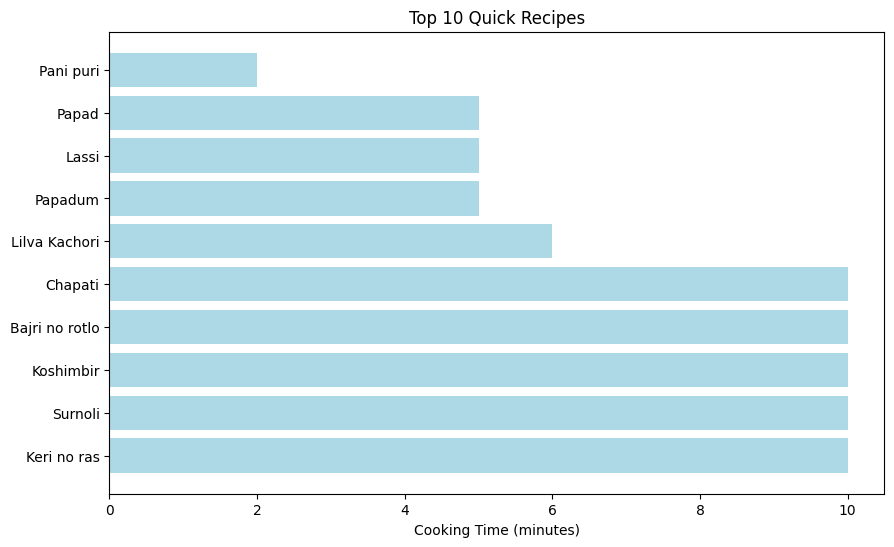

In [43]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(Top_quick_recipes['name'], Top_quick_recipes['cook_time'], color='lightblue')
plt.xlabel('Cooking Time (minutes)')
plt.title('Top 10 Quick Recipes')
plt.gca().invert_yaxis()  # Invert y-axis to have the shortest time on top
plt.show()


### Insights

**1. Efficiency in Cooking:** The bar chart highlights the quickest recipes available, showcasing options that save time in meal preparation. This is particularly valuable for individuals with busy schedules seeking efficient cooking solutions.

**2. Diverse Recipe Selection:** By analyzing the top quick recipes, it's evident that there is a variety of cuisines and dish types represented. This diversity caters to different taste preferences and dietary needs, encouraging exploration beyond typical quick meals.

**3. Time Management:** Understanding which recipes require the least cooking time aids in better meal planning. This can enhance overall productivity in the kitchen, allowing for more time to focus on other activities or enjoy meals with family and friends.

**4. Encouraging Healthy Choices:** Many quick recipes can be healthy options, making them suitable for those looking to maintain a balanced diet without spending excessive time in the kitchen. This insight aligns with current trends in health-conscious cooking.

**5. Recipe Development Opportunities:** The analysis may reveal gaps or trends in quick recipes, presenting opportunities for future recipe development. Chefs and food creators can use this data to innovate and create new quick dishes that appeal to a wide audience.

In [44]:
# Sort the DataFrame by cook_time in descending order
long_cook_times = cooking_time.sort_values(by='cook_time', ascending=False)

# Get the top N dishes that take the longest time to cook
Top_long_cook_recipes = long_cook_times.head(10)

Top_long_cook_recipes


,name,cook_time
62,Shrikhand,720.0
114,Pindi chana,120.0
27,Malapua,120.0
75,Biryani,120.0
130,Idli,90.0
115,Rajma chaval,90.0
128,Dosa,90.0
34,Rasgulla,90.0
142,Kuzhakkattai,90.0
144,Masala Dosa,90.0


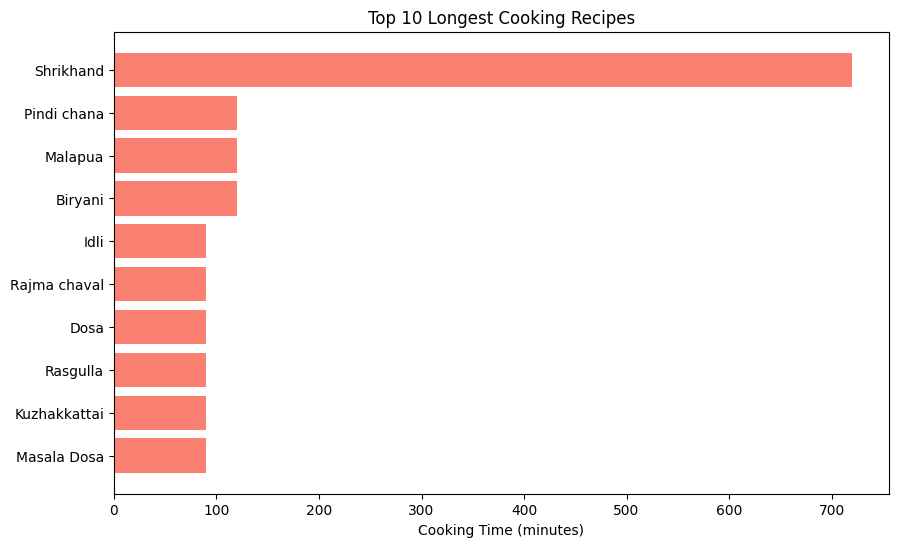

In [45]:
# Create the bar chart for the longest cooking times
plt.figure(figsize=(10, 6))
plt.barh(Top_long_cook_recipes['name'], Top_long_cook_recipes['cook_time'], color='salmon')
plt.xlabel('Cooking Time (minutes)')
plt.title('Top 10 Longest Cooking Recipes')
plt.gca().invert_yaxis()  # Invert y-axis to have the longest time on top
plt.show()




### Insights

1. **Culinary Depth**: The graph illustrates the recipes that require the most time to prepare, highlighting the culinary techniques and complexities involved. These dishes often offer richer flavors and textures due to extended cooking methods.

2. **Meal Preparation Planning**: Understanding which dishes take longer to cook is essential for effective meal planning. This insight enables home cooks to allocate adequate time for preparation and execution, particularly when entertaining guests or preparing special meals.

3. **Cultural Exploration**: Many of the longest cooking recipes often reflect traditional dishes from various cultures. This presents an opportunity to explore and appreciate diverse culinary practices and ingredients.

4. **Investment in Quality**: Longer cooking times may correlate with higher quality meals, as they allow for the development of flavors and the use of premium ingredients. This can encourage a focus on quality over speed in cooking.

5. **Potential for Meal Prepping**: Identifying these longer recipes can be beneficial for meal prepping. Cooks can dedicate time to prepare larger portions, allowing for multiple meals throughout the week with minimal additional effort.

